In [4]:
%matplotlib inline
import keras
import matplotlib.pyplot as plt
import numpy             as np

from keras.models         import Sequential
from keras.layers         import Dense
from keras.optimizers     import Adam
from keras.utils.np_utils import to_categorical
from keras.datasets       import mnist

path_to_fashion_mnist = '../../datasets/fashion-mnist/'

import sys
sys.path.insert(0, path_to_fashion_mnist)
from utils import mnist_reader

In [19]:
anomalies_number = 400

# Dataset creation

## Dataset loading

First, we load the fashion MNIST dataset.

In [5]:
X_train_fashion, _ = mnist_reader.load_mnist(path_to_fashion_mnist + 'data/fashion', kind = 'train')
X_test_fashion, _  = mnist_reader.load_mnist(path_to_fashion_mnist + 'data/fashion', kind = 't10k')
X_fashion          = np.concatenate((X_train_fashion, X_test_fashion)).reshape(-1, 28, 28, 1)

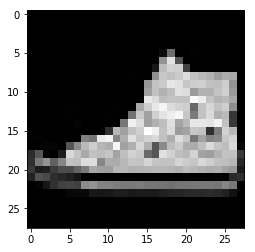

In [10]:
plt.imshow(X_fashion[35].squeeze(), cmap = 'gray')

Then we load the digit MNIST dataset.

In [6]:
(X_train_digits, _), (X_test_digits, _) = mnist.load_data()
X_digits                                = np.concatenate((X_train_digits, X_test_digits)).reshape(-1, 28, 28, 1)

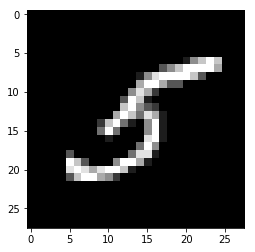

In [11]:
plt.imshow(X_digits[35].squeeze(), cmap = 'gray')

## Anomaly dataset creation creation

Now, we extract `anomaly_number` images from the fashion MNIST dataset. Then, we create a big dataset with all the MNIST digits and these `anomaly number` images.

In [13]:
anomalies = np.random.permutation(X_fashion)[:400]

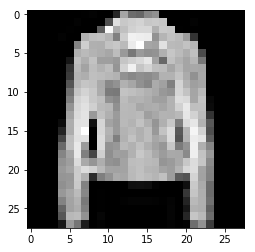

In [18]:
plt.imshow(anomalies[39].squeeze(), cmap = 'gray')

In [21]:
X = np.concatenate((X_digits, anomalies))
X = np.random.permutation(X)

# Replicator network